<h2 style="color:green" align="center">Predicting if a person would buy life insurnace based on his age using logistic regression</h2>

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't). 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("data/insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 564.0 bytes


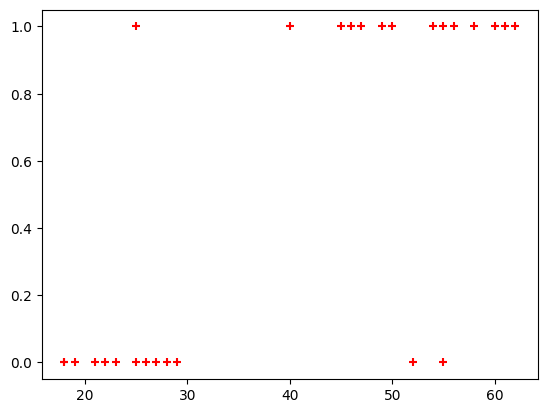

In [4]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [8]:
df.shape

(27, 2)

In [5]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [12]:
X_test

,age
13,29
9,61
4,46
2,47
17,58
21,26


In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [19]:
model.fit(X_train, y_train)

LogisticRegression()

In [20]:
X_test

,age
13,29
9,61
4,46
2,47
17,58
21,26


In [21]:
y_test

13    0
9     1
4     1
2     1
17    1
21    0
Name: bought_insurance, dtype: int64

In [22]:
y_predicted = model.predict(X_test)
y_predicted

array([0, 1, 1, 1, 1, 0], dtype=int64)

In [23]:
model.predict_proba(X_test)

array([[0.77387262, 0.22612738],
       [0.08061541, 0.91938459],
       [0.32819437, 0.67180563],
       [0.30346048, 0.69653952],
       [0.11002514, 0.88997486],
       [0.82833022, 0.17166978]])

In [24]:
model.score(X_test,y_test)

1.0

In [25]:
y_predicted

array([0, 1, 1, 1, 1, 0], dtype=int64)

In [26]:
X_test

,age
13,29
9,61
4,46
2,47
17,58
21,26


**model.coef_ indicates value of m in y=m*x + b equation**

In [27]:
model.coef_

array([[0.11451011]])

**model.intercept_ indicates value of b in y=m*x + b equation**

In [28]:
model.intercept_

array([-4.55110194])

**Lets defined sigmoid function now and do the math with hand**

In [29]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [30]:
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [31]:
age = 35
prediction_function(age)

0.4850044983805899

**0.485 is less than 0.5 which means person with 35 age will *not* buy insurance**

In [32]:
age = 43
prediction_function(age)

0.568565299077705

**0.485 is more than 0.5 which means person with 43 will buy the insurance**